#World happiness Project


## In this project we can predict the happiness score of each country by considering the various factors like Family,trust,health,etc,.

In [2]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Use pd.read_csv() to read the file and assign it to variable call "df"
df = pd.read_csv('happiness_score_dataset.csv')

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
# Look into shape using data.shape(). This will tell me how many rows and columns there are.
df.shape

(158, 12)

In [6]:
# Now lets see data types using data.dtypes
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [7]:
# Let's calculate the number of null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
#statistical summary
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [9]:
#Dropping the unwanted columns

df = df.drop(["Region","Standard Error","Happiness Rank","Country"],axis=1)
df.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


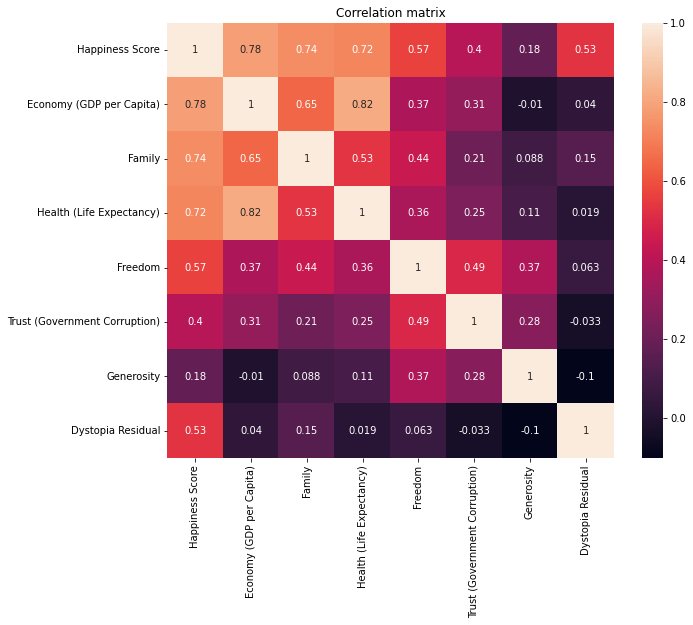

In [10]:
#plotting the correlation matrix

corr_matrix = df.corr()
plt.figure(figsize=[10,8])
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

In [11]:
#Splitting the independent and target variables as x and y respectively

y = df["Happiness Score"]
x = df.drop(["Happiness Score"],axis=1)

In [12]:
#checking the skewness

x.skew().sort_values(ascending=False)

Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
Economy (GDP per Capita)        -0.317575
Freedom                         -0.413462
Health (Life Expectancy)        -0.705328
Family                          -1.006893
dtype: float64

In [13]:
# removing the skewness from power_transform funtion

from sklearn.preprocessing import power_transform
x_n = power_transform(x)

x = pd.DataFrame(x_n,columns=x.columns)
x.skew().sort_values(ascending=False)

Trust (Government Corruption)    0.185965
Dystopia Residual                0.022925
Generosity                       0.013320
Freedom                         -0.080728
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
dtype: float64

In [14]:
#importing a necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#Evaluating model performance
# Now data is preprocessed and we can go for selecting best random state
Max_score = 0
maxRS = 0 #best random state value for max r2_score
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = i)
  LR = LinearRegression()
  LR.fit(x_train,y_train)
  predic = LR.predict(x_test)
  acc = r2_score(y_test,predic)
  if acc > Max_score:
    Max_score = acc
    maxRS = i
print("Best R2_score is ",Max_score," on Random state ",maxRS)



Best R2_score is  0.9961125135438151  on Random state  129


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = 129)

In [16]:
print(x_train.shape,y_train.shape)

(126, 7) (126,)


In [17]:
print(x_test.shape,y_test.shape)

(32, 7) (32,)


In [18]:
#just to predict the happiness score,we can consider Linearregression model
LR = LinearRegression()
LR.fit(x_train,y_train)
predic = LR.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic)))

r2_score is 0.996


In [19]:
#Now we predict the happiness score by feeding the dummy input data as shown below

predic_x = pd.DataFrame({"Economy (GDP per Capita)":0.669392,"Family":0.361352,'Health (Life Expectancy)':-1.811781,"Freedom":-0.659400,"Trust (Government Corruption)":0.555432,"Generosity":-0.207519,"Dystopia Residual":-0.928565},index=[0])
print(LR.predict(predic_x))

[4.7315413]


### In this project,Im able to predict the happiness score given the data for factors like generosity,family,etc.,and used a Linear regression model for this project because of continuous data along with that I have used r2_score as metric to evaluate performance of a regression model. It is also called Coefficient of Determination. It gives us an idea of goodness of fit for the linear regression models. It indicates the percentage of variance that is explained by the model.In general, the higher the R2 Score value, the better the model fits the data. 